<a href="https://colab.research.google.com/github/hailes1/MCMProjects/blob/main/Traveling_Salesperson_Problem_Dag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traveling Salesperson Problem

Math 242 Modern Computational Math

The traveling salesperson problem (TSP) is a classic problem in combinatorial optimization. Given $N$ points in a plane, we want to find the shortest path that visits all $N$ points and returns to the starting point. This is a notoriously difficult problem (it's [NP-hard](https://en.wikipedia.org/wiki/NP-hardness)). The runtime of the best known algorithms for solving the problem exactly increases exponentially in $N$. However, we can use simulated annealing to find an approximate solution.

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

## Points and Tours

First generate $N$ random points in the square $[0,1]\times[0,1]$:

In [ ]:
# generate N random points here
N = 20
points = np.random.rand(N, 2) # random matrix with N rows and 2 colomns
points

array([[0.08040238, 0.82787651],
       [0.63931665, 0.55289589],
       [0.1423238 , 0.64995577],
       [0.01483876, 0.21815452],
       [0.69659911, 0.22420529],
       [0.64082535, 0.7613224 ],
       [0.67359858, 0.45269524],
       [0.14532796, 0.89648639],
       [0.20721954, 0.03093337],
       [0.18960805, 0.50378129],
       [0.24318901, 0.60539693],
       [0.86735168, 0.46551246],
       [0.16026561, 0.33951481],
       [0.62566606, 0.34387118],
       [0.47086691, 0.30200133],
       [0.06097084, 0.70415566],
       [0.02432097, 0.8042653 ],
       [0.01504717, 0.15547652],
       [0.58514744, 0.54535289],
       [0.00696267, 0.41247237]])

We want to find a "tour" that visits each point once and returns to the starting point.
One way to represent the tour is a permutation
$$t_0, t_1, \ldots, t_{N-1}$$
of the indexes $0, 1, \ldots, N-1$.
For example, $0, 1, \ldots, N-1$ is a tour; we'll call it the _trivial tour_.

In [ ]:
# create the trivial tour here
trivialTour = np.array(range(N))
trivialTour

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

We could also make a random tour by choosing a random sample of the integers $0$ to $N-1$.

In [ ]:
# create a random tour here
randomTour = np.random.choice(range(N), size = N, replace = False)
randomTour

array([ 7, 19,  5,  4, 10, 13,  6,  0, 11, 17,  2, 14, 15,  3,  9, 16, 12,
       18,  1,  8])

Here is a function that plots a set of points and a tour among them:

In [ ]:
# function to plot points and a tour among them
def plotTour(points, tour):
  n = len(points)
  tourPts = np.zeros((n,2))
  for i in range(n):
    tourPts[i] = points[tour[i]]
    
  plt.figure(figsize=(10,10), dpi=60)
  path = plt.Polygon(tourPts, fill=None, edgecolor='0.5') # create the tour
  plt.gca().add_patch(path) # add the tour to the plot
  plt.plot(points[:,0], points[:,1], 'go') # plot the points
  for i in range(n): # add text labels
    plt.text(points[i,0]+0.02, points[i,1]-0.01, str(i))
  plt.xlim(0,1)  # set the x-axis limits
  plt.ylim(0,1)  # set the y-axis limits
  plt.show()     # show the plot

Try it out! Plot some tours among your points:

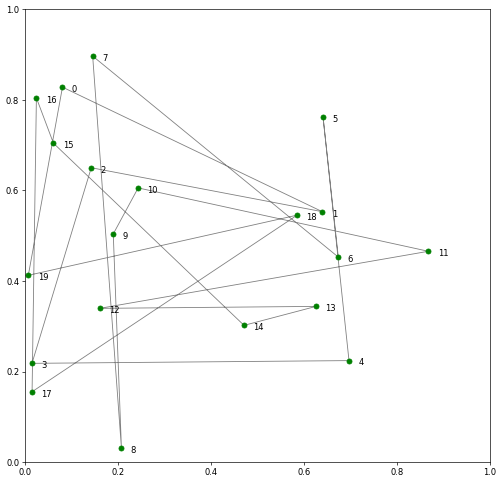

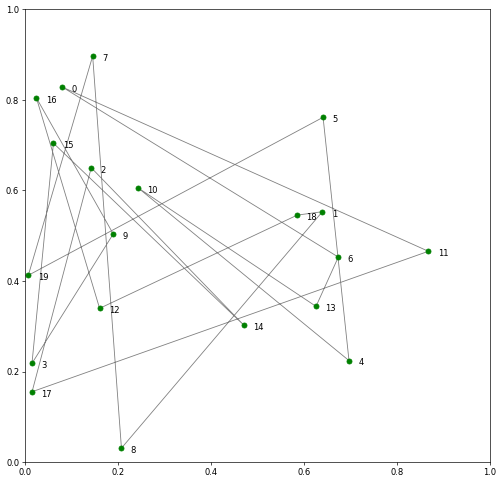

In [ ]:
plotTour(points,trivialTour)
plotTour(points,randomTour)

## Finding an Approximately-Minimal Tour

We can use simulated annealing to find an approximately minimal tour. As usual, we need to specify three things:

1. **States:** Each tour is a state.
2. **Function to minimize**: We want to minimize the length of a tour.
3. **Transitions between states**: How can we take a tour and modify it a little bit to get a new tour?

Let us Implement a simulated annealing algorithm to find approximate solutions to the traveling
salesperson problem. We are going to set things up so we can easily vary the number of points n. 


#Question Number 1 

In the code chunk below we first try to initialize the random tour we want to optimize. 

In [ ]:
def randomPath(n):
  randomTour = np.random.choice(range(n), size = n, replace = False)
  return randomTour

In [ ]:
randomTour = randomPath(20)
randomTour

Next we are going to try to see if we can propose a move by taking in a random number i and j and see if we can switch/change the direction of the path. When repeated this will grantee us an optimum path. 

In [ ]:
def proposeMove(currState, n):
  propState = currState.copy()   
  #print(currState)
  i = random.randrange(0,n)
  j = random.randrange(0,n)
    
  while i>=j: 
    i = random.randrange(0,n)
    j = random.randrange(0,n)
  
  
  #print(currState)
  #print(i,j)
  propState[i+1:j+1] = propState[j:i:-1]
  #print(propState)
  return propState

Now that we have created the function, let's try to test it and see if it's working. 

In [ ]:
currState = randomPath(20)
proposeMove(currState, 20)

array([ 7,  9,  0,  4,  6, 15,  2, 16,  8, 17, 10,  3, 13, 12, 14,  1, 18,
        5, 19, 11])

In [ ]:
# write a function that computes the length of a given tour among a set of points
def computeTourLength(points, tour, n):
  dist1 = 0
  for i in range(n):
    if i == n-1:
      break
    x = points[tour[i], 0]
    y = points[tour[i], 1]
    x1 = points[tour[i+1], 0]
    y1 = points[tour[i+1], 1]
    dist1 += math.sqrt(((x1-x)**2)+((y1-y)**2))

  x = points[tour[0], 0]
  y = points[tour[0], 1]
  x1 = points[tour[n-1], 0]
  y1 = points[tour[n-1], 1]
  dist2 = math.sqrt(((x-x1)**2)+((y-y1)**2))
  finaldist = dist1 + dist2
  return finaldist

In the code chunk above we created a function that takes a list of points and calculates the distance bettween them, repeated many times this gurantees us the total distance value of the list of tours we created earlier in this project. 

In [ ]:
# function to make a move, deciding whether or not to accept the proposed move
def doMove(currState, k, n, points):
  # propose a move
  propState = proposeMove(currState, n)
  # compute the function value difference
  df = computeTourLength(points, propState, n) - computeTourLength(points, currState, n)

  # if df < 0, then make the move
  if df < 0:
    return propState
  
  # if df > 0, then make the move with probability rho
  rho = math.exp(-df/k)
  rand = random.random()   # random number between 0 and 1
  if rand < rho: # then move
    return propState
  # else: don't move
  return currState

starting state: [11 28 21 38 48  1 16 46  7 18 36  9  2 43 22  8 31  5 10 39 45 26 44 35
 15 14 30 32 49 42 34 29  6 23 19 47  3 33 20 25 24 12  0 40 17 27 37 41
  4 13]
starting f(state): 25.868930290624665


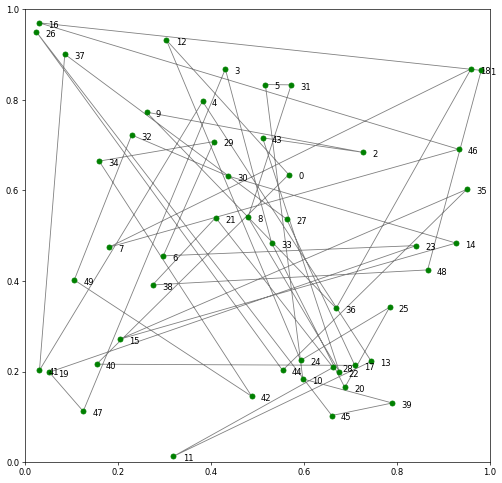

ending state: [11 47 41 19 40 15 38  6  7 49 34 32 37 26 16 12  9  4  3  5 31 43 29 30
 21  8 33 27  0  2 18  1 46 35 14 23 48 25 36 13 17 22 39 45 20 28 10 24
 44 42]
ending f(state): 5.491701995074268
k: 2.2487748498162775e-44


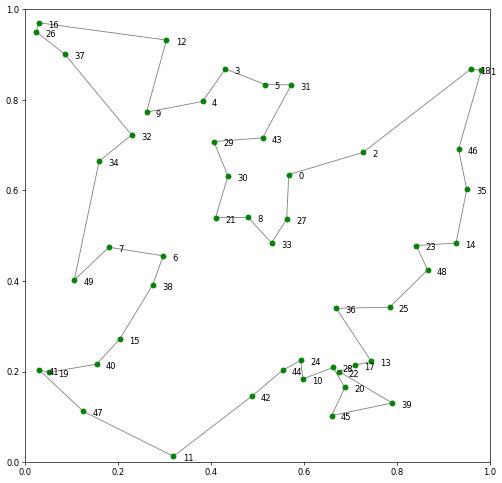

In [ ]:
# simulate the random walk
N = 50
points = np.random.rand(N, 2) # random matrix with N rows and 2 colomns
points

numSteps = 10000
k = 1
decFac = 0.99  # decrease factor

state = randomPath(50)
n = 50
print("starting state:", state)
print("starting f(state):", computeTourLength(points, state, n))
plotTour(points,state)

fvals = [computeTourLength(points,state, n)] # keep track of function values 
for i in range(numSteps):
  # make a move
  state = doMove(state, k, n, points)
  fvals.append(computeTourLength(points, state, n))

  # decrease k a little bit
  k = k*decFac

print("ending state:", state)
print("ending f(state):", computeTourLength(points, state, n))
print("k:", k)

plotTour(points,state)

Let's try to see when n=90. 

starting state: [66 49 44 82 32 12 54 77 14 60 70 18 36 71 47 89 29 34 22 16  7  8 15 72
 24 75 42 83  9 63 46 26 38 86 57 59 51 17 31 78 85  1 87 27  5 50 19 10
 13 61  0  3  4 21 52 68 41 37 40 55 30 20 73 67 53  6 25 58 84 45 76 80
 43 39 11 48 33 79 81 74 69 28 35 88 62 23  2 56 64 65]
starting f(state): 46.244346855007265


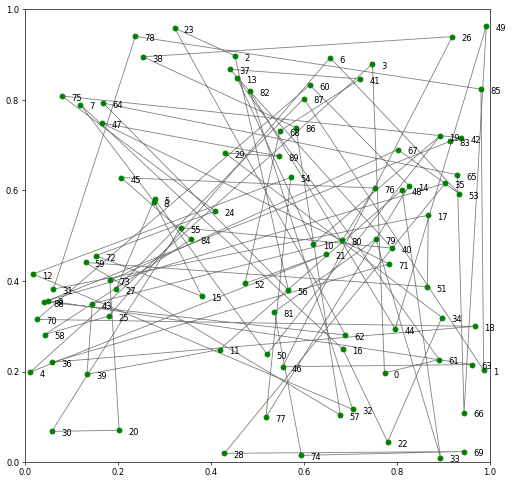

ending state: [66 69 33 22 32 62 16 57 74 28 77 46 50 81 56 21 80 10 54 89 86 68 29 84
 55 24 52 15 11 27 43 25 20 30 39 36  4 58 70 88  9 12 31 59 72 73  8  5
 45 47  7 75 64 78 38 37  2 23 13 82 87 60  6  3 41 67 49 26 85 42 83 19
 65 35 53 17 40 79 76 14 48 71 51 34 44  0 61 18  1 63]
ending f(state): 8.564803028369216
k: 2.2487748498162775e-44


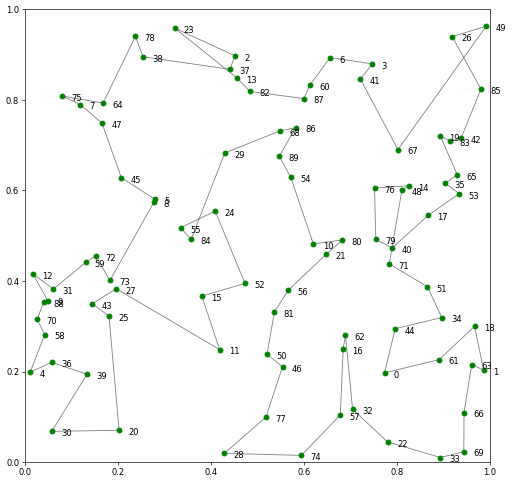

In [ ]:
# simulate the random walk
N = 90
points = np.random.rand(N, 2) # random matrix with N rows and 2 colomns
points

numSteps = 10000
k = 1
decFac = 0.99  # decrease factor

state = randomPath(90)
n = 90
print("starting state:", state)
print("starting f(state):", computeTourLength(points, state, n))
plotTour(points,state)

fvals = [computeTourLength(points,state, n)] # keep track of function values 
for i in range(numSteps):
  # make a move
  state = doMove(state, k, n, points)
  fvals.append(computeTourLength(points, state, n))

  # decrease k a little bit
  k = k*decFac

print("ending state:", state)
print("ending f(state):", computeTourLength(points, state, n))
print("k:", k)

plotTour(points,state)

# Question Number 2

Now that we have seen how to caluclate the optimized path for the travelling salesman problem we should investigate how the approximate length of the near-optimal tour depend on N? To be able to do this we are first going to create a function that takes in a value of n and simulates the annealing. We will then have a list comprehension where we run that code multiples times and find the average. We are going to try to plot a graph to estimate the average lengths of near-optimal tours for different
values of N. 

In [ ]:
# simulate the random walk
def simulatePattern(n):
  points = np.random.rand(n, 2) # random matrix with N rows and 2 colomns

  numSteps = 20000
  k = 1
  decFac = 0.99  # decrease factor

  state = randomPath(n)
  #print("starting state:", state)
  #print("starting f(state):", computeTourLength(points, state, n))
  #plotTour(points,state)

  fvals = [computeTourLength(points,state, n)] # keep track of function values 
  for i in range(numSteps):
    # make a move
    state = doMove(state, k, n, points)
    fvals.append(computeTourLength(points, state, n))

    # decrease k a little bit
    k = k*decFac
  return computeTourLength(points,state,n)

In [ ]:
simulatePattern(30)

4.911059432709573

In [ ]:
def totalRuns(n):
  totalRuns = [simulatePattern(n) for i in range(10)]
  avg = sum(totalRuns)/len(totalRuns)
  return avg

In [ ]:
totalRuns(5)

[1.8381764853869331]

In [ ]:
totalavg = [totalRuns(n) for n in range(5,50,5)]
totalavg

[2.129012344183477,
 3.0732264604436246,
 3.437004500538368,
 4.0383325067801135,
 4.470450806028062,
 4.641204379808901,
 5.143298214107633,
 5.7081647216897675,
 5.74985296388697]

'function value'

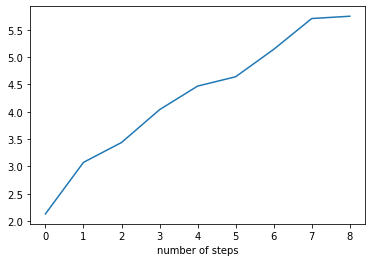

In [ ]:
plt.plot(totalavg)
plt.xlabel("number of steps")
plt.ylabel;("function value")

# Conclusion 

In this project we tried to implement a simulated annealing algorithm to find approximate solutions to the traveling salesperson problem. In the above code chunks we set things up so we can easily vary the number of points n. We tried to see if the algorithm can do n=50(First Example) and n = 90(Second Example).

In the second part of the project we could see that as n increased from 5 to 50 in increments of 50 then so did our average length of the optimal tour

# Limitations

One thing that really interests me is solving other NP hard problems using simulated annealing. For example I am really interested in solving the vector cover problem, clique problem, or even  the maximum independant set problem. 

I am interested to also calculate the time complexity of the simulated annealing alogorithm for the TSP project. It is obviously polynomial but a more specific answer. 